In [2]:
import sgGSEA as sg
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Show names of all queryable gene set libraries.
sg.show_library_names()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2

In [4]:
# Download a gene set library selected by its name.
go_cc_2023 = sg.get_library('GO_Cellular_Component_2023')

In [5]:
# Show names of all gene sets in downloaded gene set library.
sg.show_gene_set_names(go_cc_2023)

In [5]:
# Retrieve a gene set from the library selected by its name.
target_gene_set = sg.get_gene_set(go_cc_2023, 'Nuclear Membrane (GO:0031965)')

In [6]:
query_gene_set = sg.get_query_gene_set("data/pd_PD_with_TcvsCtrl_with_Tc_deg.csv", alpha=0.01)

In [7]:
query_gene_set

0            DLX6-AS1
1             RPL10P9
2       CCDC144NL-AS1
3                DLX1
4             SLITRK2
            ...      
1847       AP002387.1
1848           MAD2L1
1849         TMEM150C
1850             DOK5
1851            APOL2
Name: gene_name, Length: 1852, dtype: object

In [8]:
# Rank all genes in the network based on their centralities w.r.t. the selected target gene set. 
# If you want to rank only a selected subset, provide a query gene set.
# Note that only those genes of the query appear in the results which correspond to nodes in the network.
results_pagerank = sg.rank_genes('networks/iid_brain_ppi.txt', target_gene_set, 'pagerank', query_gene_set=query_gene_set, sep=",")

In [9]:
# Show the results for the pagerank centrality.
results_pagerank

,symbol,pagerank,p_value,degree,in_target_gene_set
0,PTH1R,0.022126,0.009901,105,False
1,LRRTM1,0.016535,0.009901,37,False
2,ZDHHC22,0.000541,0.009901,1,False
3,TNFSF10,0.029454,0.009901,122,False
4,IL9R,0.015603,0.009901,45,False
...,...,...,...,...,...
1119,SHROOM2,0.019598,1.000000,190,False
1120,IRX2,0.001521,1.000000,17,False
1121,GRIN1,0.031721,1.000000,321,False
1122,CD4,0.023312,1.000000,228,False


In [10]:
# Same command but this time using betweenness centrality.
results_betweenness = sg.rank_genes('networks/BioGRID.txt', target_gene_set, 'betweenness', query_gene_set=None)

In [11]:
# Show the results for the betweenness centrality.
results_betweenness

,symbol,betweenness,p_value,degree,in_target_gene_set
0,ZNF623,0.000051,0.009901,4,False
1,CSRNP1,0.000074,0.009901,8,False
2,MAPKAPK2,0.000327,0.009901,50,False
3,EMC1,0.000428,0.009901,37,False
4,AAAS,0.000122,0.009901,21,False
...,...,...,...,...,...
16697,FAM178B,0.000000,1.000000,1,False
16698,ZKSCAN2,0.000000,1.000000,1,False
16699,NKX1-1,0.000000,1.000000,1,False
16700,TFPI2,0.000000,1.000000,2,False


In [22]:
results_betweenness[results_betweenness["in_target_gene_set"] == True].sort_values("betweenness", ascending=False).iloc[:20]

,symbol,betweenness,p_value,degree,in_target_gene_set
11441,XPO1,0.022399,0.712871,1211,True
135,ALOX5,0.006078,0.009901,57,True
30,LMNA,0.005201,0.009901,226,True
256,KPNB1,0.004651,0.009901,218,True
8518,SMAD3,0.002302,0.425743,312,True
11212,TRIM27,0.001892,0.683168,313,True
1197,EMD,0.001638,0.039604,162,True
7,NUP153,0.001584,0.009901,108,True
461,NUP107,0.001581,0.019802,97,True
346,SYNE4,0.001443,0.019802,92,True


<Axes: xlabel='degree', ylabel='pagerank'>

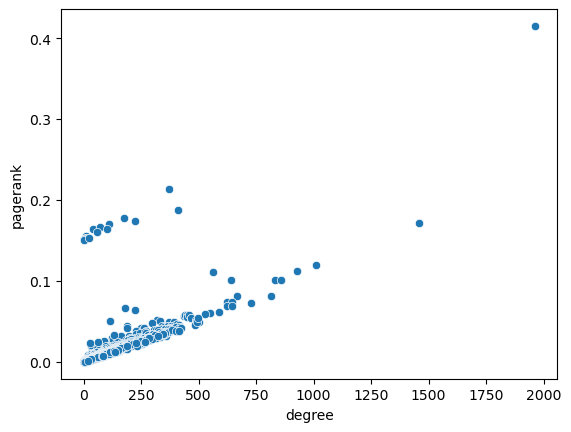

In [12]:
# Positive correlation between degree and pagerank centrality.
sns.scatterplot(data=results_pagerank, x='degree', y='pagerank')

<Axes: xlabel='degree', ylabel='p_value'>

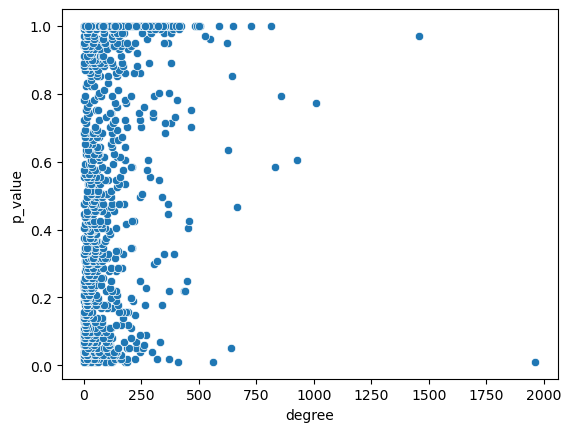

In [23]:
# Apparently no correlation for P-value
sns.scatterplot(data=results_pagerank,x='degree', y='p_value')

<Axes: xlabel='degree', ylabel='betweenness'>

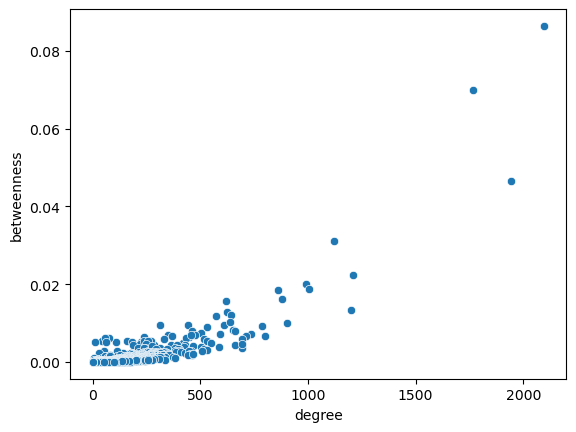

In [24]:
# Linear trend between degree and pagerank centrality.
sns.scatterplot(data=results_betweenness, x='degree', y='betweenness')

<Axes: xlabel='degree', ylabel='p_value'>

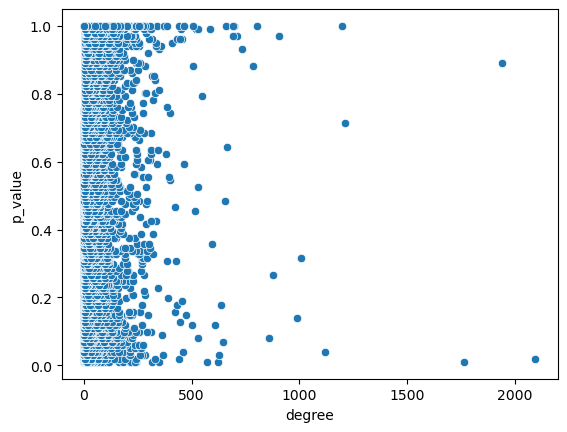

In [25]:
# Apparently no correlation for P-value.
sns.scatterplot(data=results_betweenness, x='degree', y='p_value')